In [1]:
import sys
sys.path.append("../../../")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
phi = -0.8
theta = 0.4
sigma = 2
center = 50
sample = 100

noize = np.random.normal(loc=0, scale=sigma, size=sample+1)
y0 = center
y = np.zeros(sample+1)
y[0] = y0
    
for k in range(sample):
    y[k+1] = center + phi * y[k] + noize[k+1] + theta*noize[k]
y= y

#パラメータの予測
#次数の推定

import statsmodels.api as sm

print(sm.tsa.arma_order_select_ic(y, max_ar=2, max_ma=2, ic='aic'))

{'aic':             0           1           2
0  594.869509  541.362725  529.998555
1  495.935533  492.173337  492.840784
2  494.118963  493.105343  491.960529, 'aic_min_order': (2, 2)}


In [3]:
# ARMAモデルの作成と推定

model = sm.tsa.ARMA(y, order=(1, 1))
result = model.fit()

print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  101
Model:                     ARMA(1, 1)   Log Likelihood                -242.087
Method:                       css-mle   S.D. of innovations              2.626
Date:                Sun, 31 Jan 2021   AIC                            492.173
Time:                        18:55:57   BIC                            502.634
Sample:                             0   HQIC                           496.408
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.9824      0.178    157.621      0.000      27.634      28.330
ar.L1.y       -0.9793      0.028    -34.432      0.000      -1.035      -0.924
ma.L1.y        0.3403      0.127      2.690      0.0

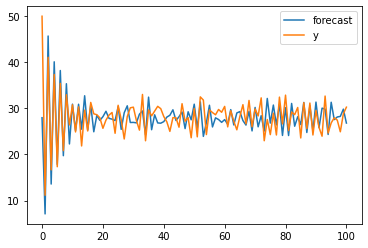

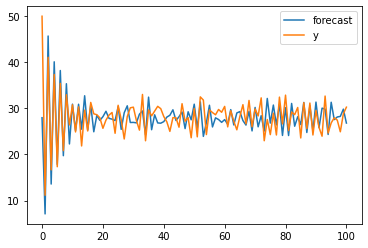

In [4]:
result.plot_predict()